In [1]:
#%matplotlib notebook

#load dependencies
import json
import requests
from matplotlib import pyplot as plt
from scipy.stats import linregress
from pprint import pprint
import pandas as pd
import scipy.stats as st
import seaborn as sns

In [2]:
# read in files
data = pd.read_csv('Clean_Data_Output/Clean_Data_Final.csv')
home_values = pd.read_csv('Resources/median_house_value.csv')
income = pd.read_csv('Clean_Data_Output/Data.csv')
poverty = pd.read_csv('Resources/PovertyReport.csv')

# merge csv files
property_df = pd.merge(data, home_values, on='State', how='outer')
property_df = pd.merge(property_df, income, on='State', how='outer')
property_df = pd.merge(property_df, poverty, on='State', how='outer')

# check the file has been read in
property_df.head()

,Unnamed: 0_x,State,Total Murders (2019)_x,2019 Population_x,Murders Per Capita/Homicide Rate,Unemployment Rate,Abbreviation,Average FICO Score,Median Home Value,Average Outstanding Mortgage Amount,Difference Between Value and Mortgage Balance,,Unnamed: 0_y,Median Income (2019),2019 Population_y,Population (2019),Total Murders (2019)_y,Poverty Rate
0,45.0,Vermont,11.0,623989.0,0.00002,2.3,VT,726.0,210600.0,147241.0,63359.0,,45.0,74305.0,8535519.0,8535519.0,11.0,10.1
1,44.0,Utah,66.0,3205958.0,0.00002,2.3,UT,716.0,351100.0,216213.0,134887.0,,44.0,84523.0,623989.0,623989.0,66.0,8.8
2,40.0,South Carolina,445.0,5148714.0,0.00009,2.3,SC,681.0,170700.0,160059.0,10641.0,,40.0,62028.0,884659.0,884659.0,445.0,13.9
3,34.0,North Dakota,26.0,762062.0,0.00003,2.4,ND,727.0,210000.0,162774.0,47226.0,NaN,34.0,70031.0,11689100.0,11689100.0,26.0,10.5
4,5.0,Colorado,209.0,5758736.0,0.00004,2.5,CO,718.0,381300.0,259113.0,122187.0,,5.0,72499.0,3565287.0,3565287.0,209.0,9.4


In [3]:
# clean dataframe with only the relevant data
data_df = property_df[['State', '2019 Population_x', 'Median Income (2019)', 'Median Home Value','Unemployment Rate', 'Poverty Rate',
                        'Total Murders (2019)_y', 'Murders Per Capita/Homicide Rate']]

data_df = data_df.rename(columns={'2019 Population_x':'Total Population', 'Median Income (2019)':'Median Income', 
                                 'Total Murders (2019)_y':'Total Murders', 'Murders Per Capita/Homicide Rate':'Homicide Rate'})
# drop na
data_df = data_df.dropna(how='any')

# sort by highest homicide rate descending
data_df = data_df.sort_values(by='Homicide Rate', ascending=False)

# check for errors
data_df.head()

,State,Total Population,Median Income,Median Home Value,Unemployment Rate,Poverty Rate,Total Murders,Homicide Rate
48,District of Columbia,705749.0,93111.0,567800.0,5.3,14.1,166.0,0.00024
46,Louisiana,4648794.0,51707.0,147600.0,4.9,18.8,522.0,0.00011
50,Alaska,731545.0,78394.0,326000.0,6.0,10.2,69.0,0.00009
28,Maryland,6045680.0,95572.0,290500.0,3.5,9.1,551.0,0.00009
21,Missouri,6137428.0,60597.0,163700.0,3.3,12.9,566.0,0.00009


The correlation coefficient between the two factors is 0.049
The r-squared is: 0.0023795858008970167


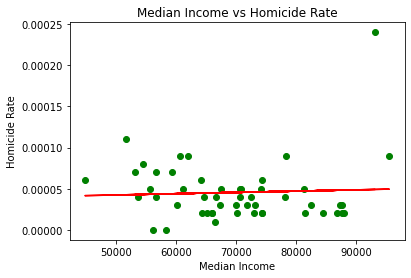

<Figure size 432x288 with 0 Axes>

In [4]:
# create scatter plot for Median Income and Homicide Rate

# plot lineregress
x_values = data_df['Median Income']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Median Income')
plt.ylabel('Homicide Rate')
plt.title('Median Income vs Homicide Rate')

# print r-valaue and show plot
corr = st.pearsonr(x_values,y_values)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save fig as output
plt.savefig('Image Output/median_income_cd')


The correlation coefficient between the two factors is 0.143
The r-squared is: 0.020438602664923856


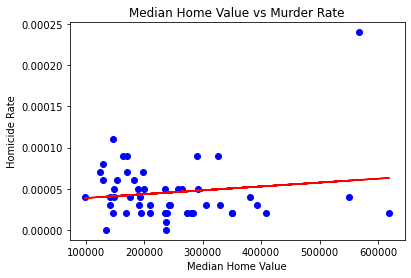

<Figure size 432x288 with 0 Axes>

In [5]:
# create scatter plot for Median Home Value and Homicide Rate

# plot lineregress
x_values = data_df['Median Home Value']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Median Home Value')
plt.ylabel('Homicide Rate')
plt.title('Median Home Value vs Murder Rate')

# print r-valaue and correlation
corr = st.pearsonr(x_values,y_values)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")

# show plot
plt.show()

# save fig as output
plt.savefig('Image Output/home_value_cd')

The correlation coefficient between the two factors is 0.388
The r-squared is: 0.1508169573224734


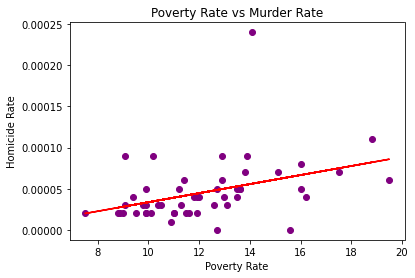

In [6]:
# create scatter plot for Poverty Rate and Homicide Rate

# plot lineregress
x_values = data_df['Poverty Rate']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='purple')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Poverty Rate')
plt.ylabel('Homicide Rate')
plt.title('Poverty Rate vs Murder Rate')

# print r-valaue and correlation
corr = st.pearsonr(x_values,y_values)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")

# show plot
plt.show()

# save fig as output
#plt.savefig('Image Output/home_value_cd')

The correlation coefficient between the two factors is 0.502
The r-squared is: 0.25247547300263684


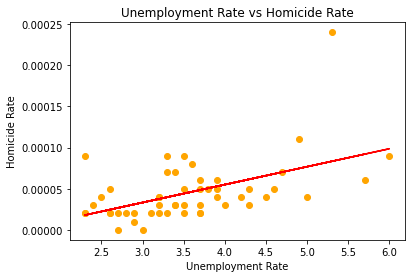

In [7]:
# create scatter plot for unemployment rate and murder rate

# plot lineregress
x_values = data_df['Unemployment Rate']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='orange')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('Homicide Rate')
plt.title('Unemployment Rate vs Homicide Rate')

# print r-valaue and show plot
unemployment = data_df['Unemployment Rate']
homicide_rate = data_df['Homicide Rate']
corr = st.pearsonr(unemployment, homicide_rate)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")

# show plot
plt.show()

# save fig as output
#plt.savefig('Image Output/unemployment_rate_cd')


In [8]:
#Create a state abbreviations list for Multi-Bar Graphs
abbrev_list = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI',
              'ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI',
              'MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND',
              'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT',
              'VA','WA','WV','WI','WY']

In [9]:
#create a dataframe for Top Five Median Income
medincome_multibar_df = data_df[['State','Median Income','Total Murders']]
medincome_multibar_df = medincome_multibar_df.sort_values('State')
medincome_multibar_df['State Abbreviations'] = abbrev_list
medincome_multibar_df = medincome_multibar_df[['State Abbreviations', 'Median Income', 'Total Murders']]
medincome_multibar_topfive_df = medincome_multibar_df.sort_values('Median Income',ascending=False).head()
medincome_multibar_topfive_df

,State Abbreviations,Median Income,Total Murders
28,MD,95572.0,551.0
48,DC,93111.0,166.0
7,HI,88006.0,32.0
27,NJ,87726.0,262.0
10,MA,87707.0,146.0


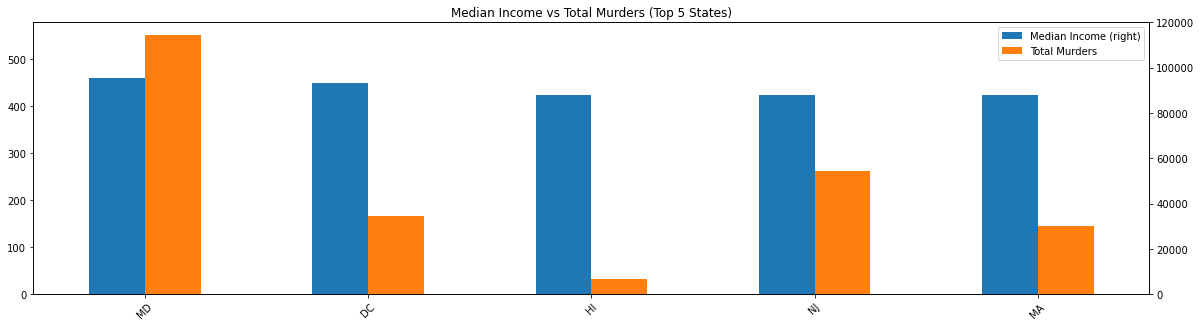

<Figure size 432x288 with 0 Axes>

In [10]:
#create and save the graph
medincome_multi_topfive_plot = medincome_multibar_topfive_df.plot(kind="bar", secondary_y = ['Median Income'], figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels
medincome_multi_topfive_plot.set_xticklabels(medincome_multibar_topfive_df['State Abbreviations'], rotation=45)
plt.title('Median Income vs Total Murders (Top 5 States)')
plt.ylim([0, 120000])
plt.show()
plt.tight_layout()
plt.savefig("Image Output/Multibar_MedianIncome_TopFive.png")

In [11]:
#create dataframe for Bottom Five Median Income
medincome_multibar_bottomfive_df = medincome_multibar_df.sort_values('Median Income',ascending=True).head()
medincome_multibar_bottomfive_df

,State Abbreviations,Median Income,Total Murders
49,MS,44787.0,189.0
46,LA,51707.0,522.0
45,NM,53113.0,146.0
47,WV,53706.0,72.0
29,AR,54539.0,231.0


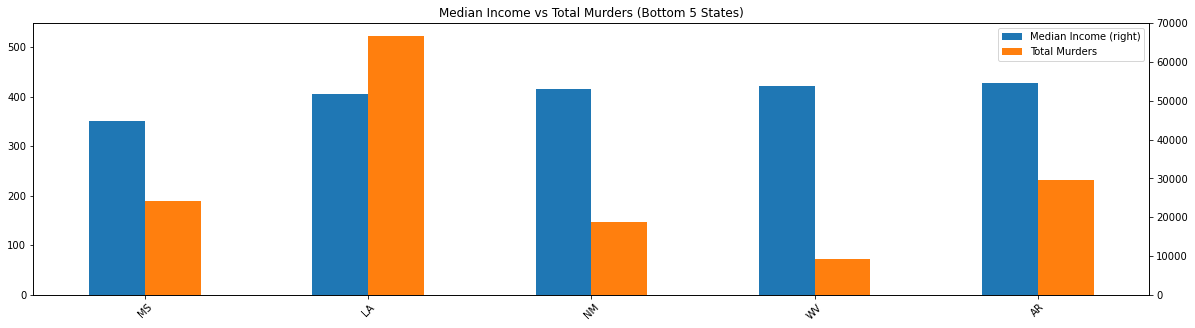

<Figure size 432x288 with 0 Axes>

In [12]:
#create and save the graph
medincome_multi_bottomfive_plot = medincome_multibar_bottomfive_df.plot(kind="bar", secondary_y = ['Median Income'], figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels
medincome_multi_bottomfive_plot.set_xticklabels(medincome_multibar_bottomfive_df['State Abbreviations'], rotation=45)
plt.title('Median Income vs Total Murders (Bottom 5 States)')
plt.ylim([0, 70000])
plt.show()
plt.tight_layout()
plt.savefig("Image Output/Multibar_MedianIncome_BottomFive.png")

In [13]:
#create a dataframe for Top Five Median Home Value
medhome_multibar_df = data_df[['State','Median Home Value','Total Murders']]
medhome_multibar_df = medhome_multibar_df.sort_values('State')
medhome_multibar_df['State Abbreviations'] = abbrev_list
medhome_multibar_df = medhome_multibar_df[['State Abbreviations', 'Median Home Value', 'Total Murders']]
medhome_multibar_topfive_df = medhome_multibar_df.sort_values('Median Home Value',ascending=False).head()
medhome_multibar_topfive_df

,State Abbreviations,Median Home Value,Total Murders
7,HI,619000.0,32.0
48,DC,567800.0,166.0
36,CA,550800.0,1679.0
10,MA,408100.0,146.0
42,WA,393800.0,194.0


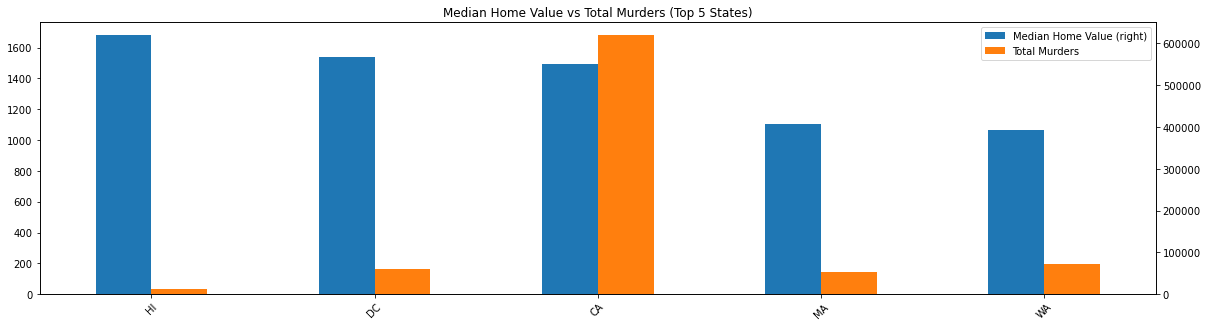

<Figure size 432x288 with 0 Axes>

In [14]:
#create and save the graph
medhome_multi_topfive_plot = medhome_multibar_topfive_df.plot(kind="bar", secondary_y = ['Median Home Value'], figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels
medhome_multi_topfive_plot.set_xticklabels(medhome_multibar_topfive_df['State Abbreviations'], rotation=45)
plt.title('Median Home Value vs Total Murders (Top 5 States)')

plt.show()
plt.tight_layout()
plt.savefig("Image Output/Multibar_MedianHome_TopFive.png")

In [15]:
#create a dataframe for Bottom Five Median Income
medhome_multibar_bottomfive_df = medhome_multibar_df.sort_values('Median Home Value',ascending=False).head()
medhome_multibar_bottomfive_df

,State Abbreviations,Median Home Value,Total Murders
7,HI,619000.0,32.0
48,DC,567800.0,166.0
36,CA,550800.0,1679.0
10,MA,408100.0,146.0
42,WA,393800.0,194.0


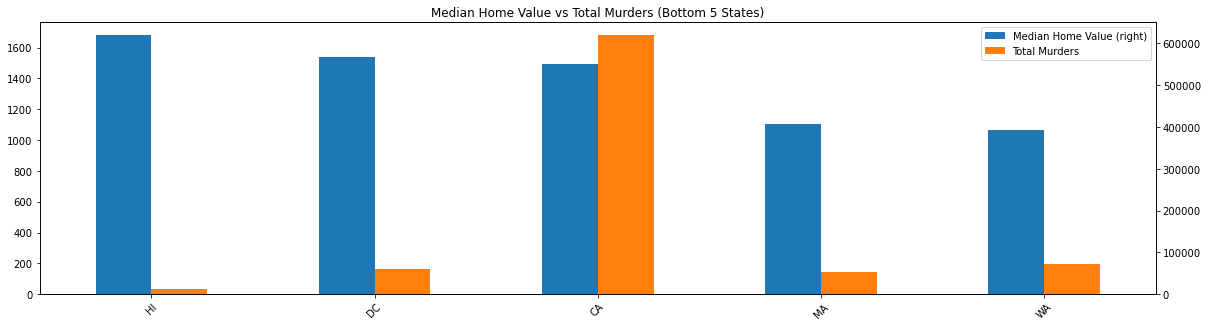

<Figure size 432x288 with 0 Axes>

In [16]:
#create and save the graph
medhome_multi_bottomfive_plot = medhome_multibar_bottomfive_df.plot(kind="bar", secondary_y = ['Median Home Value'], figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels
medhome_multi_bottomfive_plot.set_xticklabels(medhome_multibar_bottomfive_df['State Abbreviations'], rotation=45)
plt.title('Median Home Value vs Total Murders (Bottom 5 States)')

plt.show()
plt.tight_layout()
plt.savefig("Image Output/Multibar_MedianHome_BottomFive.png")

In [17]:
#create a dataframe for Top Five Poverty Rate
poverty_multibar_df = data_df[['State','Poverty Rate','Total Murders']]
poverty_multibar_df = poverty_multibar_df.sort_values('State')
poverty_multibar_df['State Abbreviations'] = abbrev_list
poverty_multibar_df = poverty_multibar_df[['State Abbreviations', 'Poverty Rate', 'Total Murders']]
poverty_multibar_topfive_df = poverty_multibar_df.sort_values('Poverty Rate',ascending=False).head()
poverty_multibar_topfive_df

,State Abbreviations,Poverty Rate,Total Murders
49,MS,19.5,189.0
46,LA,18.8,522.0
45,NM,17.5,146.0
47,WV,16.2,72.0
41,KY,16.0,221.0


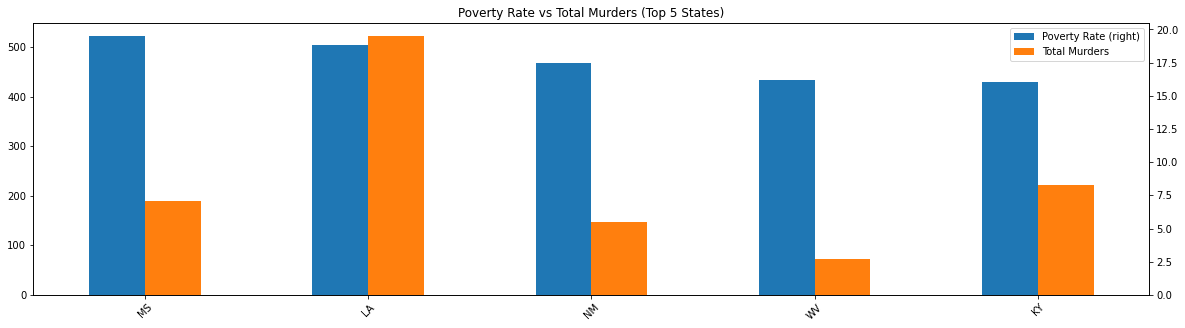

<Figure size 432x288 with 0 Axes>

In [18]:
#create and save the graph
poverty_multi_topfive_plot = poverty_multibar_topfive_df.plot(kind="bar", secondary_y = ['Poverty Rate'], figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels
poverty_multi_topfive_plot.set_xticklabels(poverty_multibar_topfive_df['State Abbreviations'], rotation=45)
plt.title('Poverty Rate vs Total Murders (Top 5 States)')

plt.show()
plt.tight_layout()
plt.savefig("Image Output/Multibar_PovertyRate_TopFive.png")

In [19]:
#create a dataframe for Bottom Five Poverty Rate
poverty_multibar_bottomfive_df = poverty_multibar_df.sort_values('Poverty Rate',ascending=True).head()
poverty_multibar_bottomfive_df

,State Abbreviations,Poverty Rate,Total Murders
6,NH,7.5,33.0
1,UT,8.8,66.0
20,MN,8.9,114.0
7,HI,9.0,32.0
28,MD,9.1,551.0


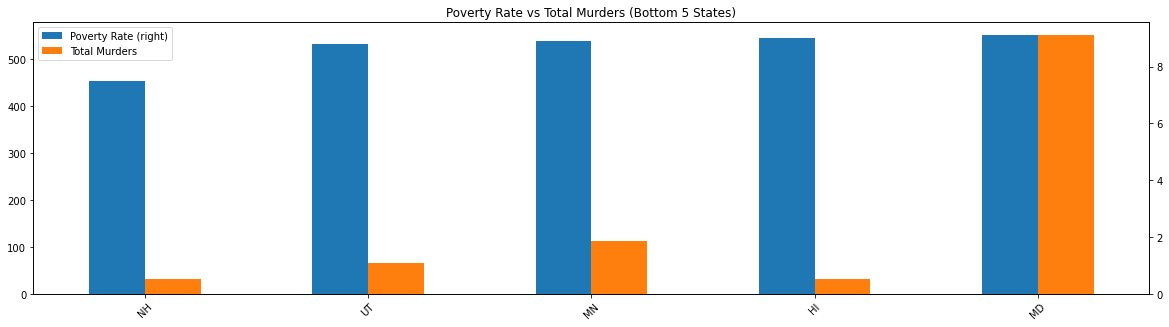

<Figure size 432x288 with 0 Axes>

In [20]:
#create and save the graph
poverty_multi_bottomfive_plot = poverty_multibar_bottomfive_df.plot(kind="bar", secondary_y = ['Poverty Rate'], figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels
poverty_multi_bottomfive_plot.set_xticklabels(poverty_multibar_bottomfive_df['State Abbreviations'], rotation=45)
plt.title('Poverty Rate vs Total Murders (Bottom 5 States)')

plt.show()
plt.tight_layout()
plt.savefig("Image Output/Multibar_PovertyRate_BottomFive.png")

In [21]:
#create a dataframe for Top Five Unemployment Rate
unemploy_multibar_df = data_df[['State','Unemployment Rate','Total Murders']]
unemploy_multibar_df = unemploy_multibar_df.sort_values('State')
unemploy_multibar_df['State Abbreviations'] = abbrev_list
unemploy_multibar_df = unemploy_multibar_df[['State Abbreviations', 'Unemployment Rate', 'Total Murders']]
unemploy_multibar_topfive_df = unemploy_multibar_df.sort_values('Unemployment Rate',ascending=False).head()
unemploy_multibar_topfive_df

,State Abbreviations,Unemployment Rate,Total Murders
50,AK,6.0,69.0
49,MS,5.7,189.0
48,DC,5.3,166.0
47,WV,5.0,72.0
46,LA,4.9,522.0


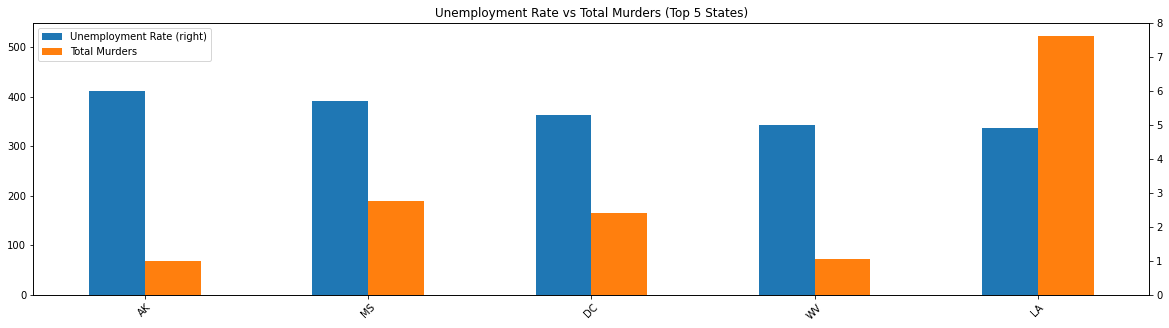

<Figure size 432x288 with 0 Axes>

In [22]:
#create and save the graph
unemploy_multi_topfive_plot = unemploy_multibar_topfive_df.plot(kind="bar", secondary_y = ['Unemployment Rate'], figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels
unemploy_multi_topfive_plot.set_xticklabels(unemploy_multibar_topfive_df['State Abbreviations'], rotation=45)
plt.title('Unemployment Rate vs Total Murders (Top 5 States)')
plt.ylim([0.0, 8.0])
plt.show()
plt.tight_layout()
plt.savefig("Image Output/Multibar_Unemployment_TopFive.png")

In [23]:
#create a dataframe for Bottom Five Unemployment Rate
unemploy_multibar_bottomfive_df = unemploy_multibar_df.sort_values('Unemployment Rate',ascending=True).head()
unemploy_multibar_bottomfive_df

,State Abbreviations,Unemployment Rate,Total Murders
0,VT,2.3,11.0
1,UT,2.3,66.0
2,SC,2.3,445.0
3,ND,2.4,26.0
4,CO,2.5,209.0


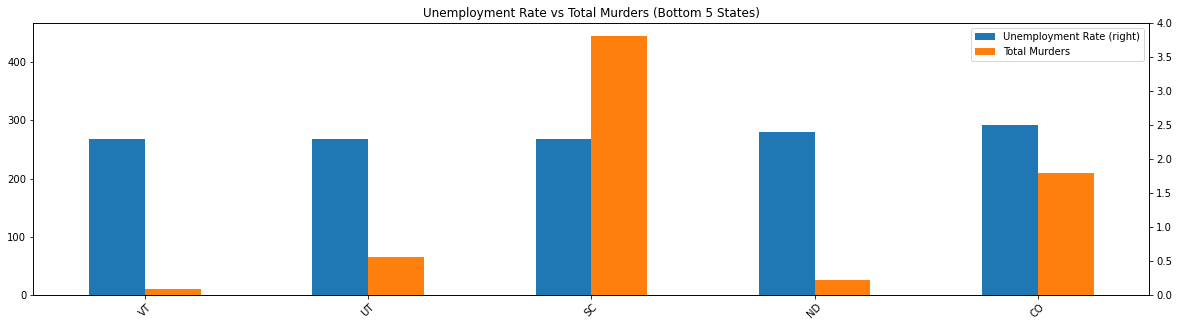

<Figure size 432x288 with 0 Axes>

In [24]:
#create and save the graph
unemploy_multi_bottomfive_plot = unemploy_multibar_bottomfive_df.plot(kind="bar", secondary_y = ['Unemployment Rate'], figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels
unemploy_multi_bottomfive_plot.set_xticklabels(unemploy_multibar_bottomfive_df['State Abbreviations'], rotation=45)
plt.title('Unemployment Rate vs Total Murders (Bottom 5 States)')
plt.ylim([0.0, 4.0])
plt.show()
plt.tight_layout()
plt.savefig("Image Output/Multibar_Unemployment_BottomFive.png")

In [25]:
# BONUS: Generate the correlation matrix and find the strongest positive and negative correlations

hm_corr = data_df.corr()
hm_corr.unstack().sort_values()

hm_corr

,Total Population,Median Income,Median Home Value,Unemployment Rate,Poverty Rate,Total Murders,Homicide Rate
Total Population,1.000000,0.011151,0.169137,0.042558,0.060073,0.847571,-0.074669
Median Income,0.011151,1.000000,0.702282,-0.192988,-0.791572,-0.015007,0.048781
Median Home Value,0.169137,0.702282,1.000000,-0.024518,-0.453434,0.079397,0.142964
Unemployment Rate,0.042558,-0.192988,-0.024518,1.000000,0.525072,0.153039,0.502469
Poverty Rate,0.060073,-0.791572,-0.453434,0.525072,1.000000,0.178898,0.388352
Total Murders,0.847571,-0.015007,0.079397,0.153039,0.178898,1.000000,0.233241
Homicide Rate,-0.074669,0.048781,0.142964,0.502469,0.388352,0.233241,1.000000


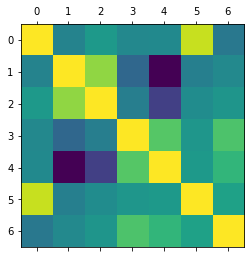

In [26]:
# correlation map for fun

plt.matshow(data_df.corr())
plt.show()

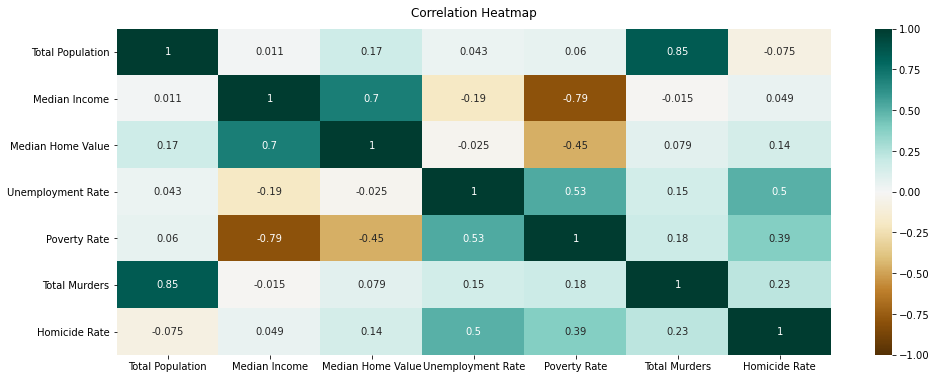

In [28]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig("Image Output/Correlation_Heatmap.png")